In [2]:
include("levinson.jl")

levinson (generic function with 1 method)

In [3]:
using LinearAlgebra

In [4]:
# Example usage
r = [1.0, -0.6, 0.4, -0.2]
sigma_sq, A, K = levinson(r)

println("Prediction Error Variances:")
println(transpose(sigma_sq))
println("Prediction Error Filter Coefficients:")
println(transpose(A))
println("PARCORS:")
println(transpose(K))


Prediction Error Variances:
[1.0 0.64 0.5174999999999998 0.5135869565217389]
Prediction Error Filter Coefficients:
[1.0 1.6 1.3375 1.2994565217391303; 0.0 0.6 -0.10000000000000042 -0.10869565217391351; 0.0 0.0 -0.4375000000000002 -0.3211956521739131; 0.0 0.0 0.0 0.08695652173913054]
PARCORS:
[0.6 -0.4375000000000002 0.08695652173913054]


In [5]:
using Random
using Plots

Prediction Error Variances:
[1.0 0.64 0.5174999999999998 0.5135869565217389]
Prediction Error Filter Coefficients:
[1.0 1.6 1.3375 1.2994565217391303; 0.0 0.6 -0.10000000000000042 -0.10869565217391351; 0.0 0.0 -0.4375000000000002 -0.3211956521739131; 0.0 0.0 0.0 0.08695652173913054]
PARCORS:
[0.6 -0.4375000000000002 0.08695652173913054]


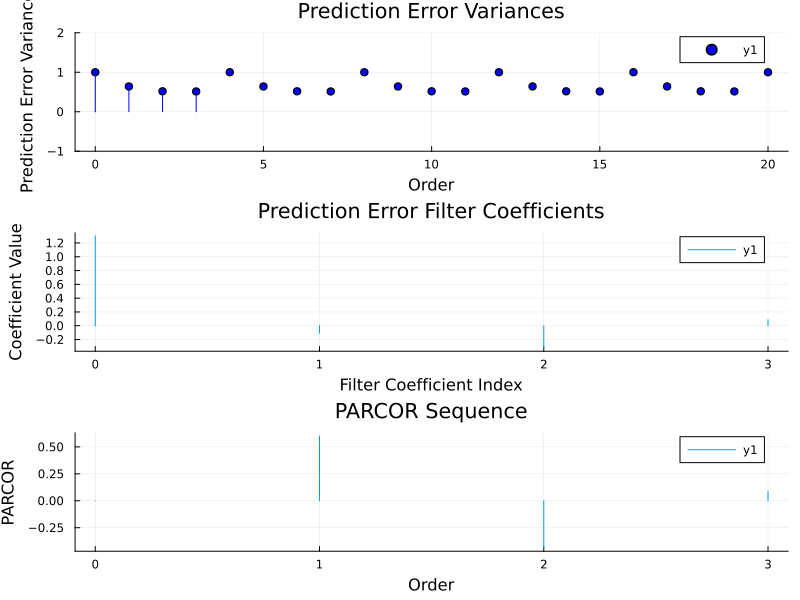

In [11]:
# Generate a random correlation sequence
r = [1.0, -0.6, 0.4, -0.2]

# Call the levinson function
sigma_sq, A, K = levinson(r)

# Display the results
println("Prediction Error Variances:")
println(sigma_sq')

println("Prediction Error Filter Coefficients:")
println(A')

println("PARCORS:")
println(K')

# Create subplots
p1 = plot(0:20, sigma_sq
    , seriestype=:stem
    , line=:stem, marker=:circle ,c=:blue
    # , ms=10, msw=0, lw=4
    , ylims=(-1,2)
    , xlabel="Order", ylabel="Prediction Error Variance", title="Prediction Error Variances")
p2 = plot(0:20, A[end, :], seriestype=:stem, xlabel="Filter Coefficient Index", ylabel="Coefficient Value", title="Prediction Error Filter Coefficients")
p3 = plot(1:20, K, seriestype=:stem, xlabel="Order", ylabel="PARCOR", title="PARCOR Sequence")

# Display the subplots together
plot(p1, p2, p3, layout=(3,1), size=(800, 600))


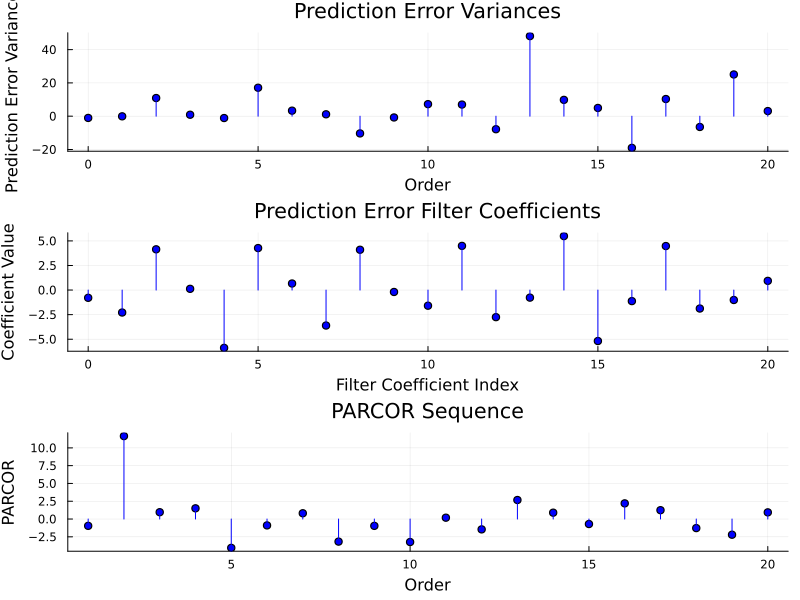

In [18]:
# Generate a random correlation sequence
r = randn(1, 21)

# Call the levinson function
sigma_sq, A, K = levinson(r)

# Create a figure with subplots
fig = plot(layout=(3, 1), size=(800, 600))

# Plot the prediction error variances
plot!(fig, 0:20, sigma_sq
    , seriestype=:stem
    , line=:stem, marker=:circle ,c=:blue
    # , ms=10, msw=0, lw=4
    , legend = :none
    , subplot=1
    , title="Prediction Error Variances"
    , xlabel="Order", ylabel="Prediction Error Variance"
    # , ylims = (-80,20)
)

# Plot the prediction error filter coefficients
plot!(fig, 0:20, A[end, :]
    , seriestype=:stem
    , line=:stem, marker=:circle ,c=:blue
    # , ms=10, msw=0, lw=4
    , legend = :none
    , subplot=2
    , title="Prediction Error Filter Coefficients"
    , xlabel="Filter Coefficient Index", ylabel="Coefficient Value"
    # , ylims = (-20,20)
)

# Plot the PARCORS
plot!(fig, 1:20, K
    , seriestype=:stem
    , line=:stem, marker=:circle ,c=:blue
    # , ms=10, msw=0, lw=4
    , legend = :none
    , subplot=3
    , title="PARCOR Sequence"
    , xlabel="Order", ylabel="PARCOR"
    # , ylims = (findmin(K),findmax(K))
)


# Show the figure
display(fig)
